- Importamos librerías:

In [3]:
import gymnasium as gym
import numpy as np
import math
import matplotlib.pyplot as plt 
import pygame

- Creamos el entorno y visualizamos los valores de los límites inferiores y superiores del entorno:

In [4]:
env = gym.make("MountainCar-v0")

In [5]:
print("Límites superiores:", env.observation_space.high)	
print("Límites inferiores:", env.observation_space.low)	
print("Número de acciones disponibles:", env.action_space.n)      

Límites superiores: [0.6  0.07]
Límites inferiores: [-1.2  -0.07]
Número de acciones disponibles: 3


# ALGORITMO Q-LEARNING

- Definimos los hiperparámetros:

In [6]:
discrete_buckets = 20 # nº de cubos en los que se dividirá el espacio de observación
episodes = 1000
discount = 0.95 #peso a las recompensas futuras en relación con las inmediatas
                #se devalúan en un 5% en cada paso de tiempo
episode_display = 10
learning_rate = 0.1
epsilon = 0.5 #misma probabilidad de que el agente elija una acción aleatoria o 
              #la mejor acción según la tabla Q
epsilon_decrementer = epsilon/(episodes//4) #el valor de epsilon se reducira a la mitad
            #aprox. después de que el agente haya completado aproximadamente la mitad 
            #de los episodios

In [8]:
#Creación de la tabla Q
q_table = np.random.randn(discrete_buckets,discrete_buckets,env.action_space.n)

# Lista para almacenar las recompensas
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

In [15]:
for episode in range(episodes):
    episode_reward = 0
    done = False
    state_array = env.reset()[0]
    curr_discrete_state = discretised_state(state_array)  # calcula el estado discreto inicial

    if episode % episode_display == 0:
        render_state = True
    else:
        render_state = False

    while not done:
        if np.random.random() > epsilon:  # genera nº aleatorio entre 0 y 1
            action = np.argmax(q_table[curr_discrete_state])  # elige la opción óptima según la tabla
        else:
            action = np.random.randint(0, env.action_space.n)  # elige acción aleatoria mediante
            # las acciones disponibles en el entorno

        new_state, reward, done, _, _ = env.step(action)
        new_discrete_state = discretised_state(new_state)
        if render_state:
            env.render()

        if not done:
            max_future_q = np.max(q_table[new_discrete_state])  # valor máximo de Q para el nuevo estado
            current_q = q_table[curr_discrete_state + (action,)]  # valor actual de Q para el par estado-acción actual
            new_q = current_q + learning_rate * (reward + discount * max_future_q - current_q)
            q_table[curr_discrete_state + (action,)] = new_q
        elif new_state[0] >= env.goal_position:  # verifica si el estado actual alcanza o supera
            # la posición objetivo
            q_table[curr_discrete_state + (action,)] = 0  # establece el valor como 0 en ese estado

        curr_discrete_state = new_discrete_state  # actualiza el estado
        episode_reward += reward  # agrega la recompensa del episodio actual a la suma total

    epsilon = epsilon - epsilon_decrementer  # reduce la probabilidad de exploración a medida
    # que el entrenamiento avanza

    ep_rewards.append(episode_reward)

    if not episode % episode_display:
        avg_reward = sum(ep_rewards[-episode_display:]) / len(ep_rewards[-episode_display:])
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg_reward)
        ep_rewards_table['min'].append(min(ep_rewards[-episode_display:]))
        ep_rewards_table['max'].append(max(ep_rewards[-episode_display:]))

        print(
            f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-episode_display:])} max:{max(ep_rewards[-episode_display:])}")

env.close()


/Users/ruthjorganestorres/anaconda3/envs/gym/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/ruthjorganestorres/anaconda3/envs/gym/lib/python3.9/site-packages/gymnasium/envs/classic_control/mountain_car.py:174: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("MountainCar-v0", render_mode="rgb_array")
  gym.logger.warn(


Episode:0 avg:-15707.0 min:-15707.0 max:-15707.0
Episode:10 avg:-2686.6 min:-12328.0 max:-778.0
Episode:20 avg:-814.3 min:-1440.0 max:-431.0
Episode:30 avg:-519.6 min:-990.0 max:-256.0
Episode:40 avg:-816.3 min:-1690.0 max:-265.0
Episode:50 avg:-1886.9 min:-7801.0 max:-449.0
Episode:60 avg:-887.9 min:-1768.0 max:-372.0
Episode:70 avg:-388.9 min:-918.0 max:-250.0
Episode:80 avg:-270.5 min:-359.0 max:-167.0
Episode:90 avg:-428.6 min:-1484.0 max:-240.0
Episode:100 avg:-258.0 min:-364.0 max:-166.0
Episode:110 avg:-275.9 min:-437.0 max:-200.0
Episode:120 avg:-270.0 min:-351.0 max:-216.0
Episode:130 avg:-228.7 min:-330.0 max:-168.0
Episode:140 avg:-357.9 min:-1371.0 max:-153.0
Episode:150 avg:-206.5 min:-297.0 max:-161.0
Episode:160 avg:-191.3 min:-252.0 max:-151.0
Episode:170 avg:-216.9 min:-271.0 max:-153.0
Episode:180 avg:-199.7 min:-369.0 max:-145.0
Episode:190 avg:-330.2 min:-1073.0 max:-157.0
Episode:200 avg:-205.5 min:-279.0 max:-117.0
Episode:210 avg:-264.0 min:-420.0 max:-156.0
Epis

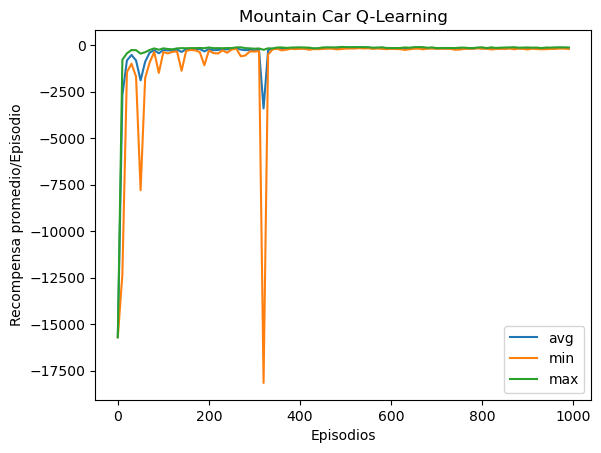

In [16]:
# Graficamos las recompensas
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4) 
plt.title('Mountain Car Q-Learning')
plt.ylabel('Recompensa promedio/Episodio')
plt.xlabel('Episodios')
plt.show()

## Métricas

**1. Media móvil** <p>
Ya que las recompensas pueden variar mucho de un episodio a otro, calcularemos la media móvil. Esto significa calcular el promedio de recompensas de x número de episodios consecutivos y así ver mejor si realmente el agente ha mejorado. Vamos a coger una ventana de 100 episodios y así ver si recientemente ha habido mejoría.

In [17]:
window_size = 100
moving_avg_rewards = np.convolve(ep_rewards, np.ones(window_size)/window_size, mode='valid')

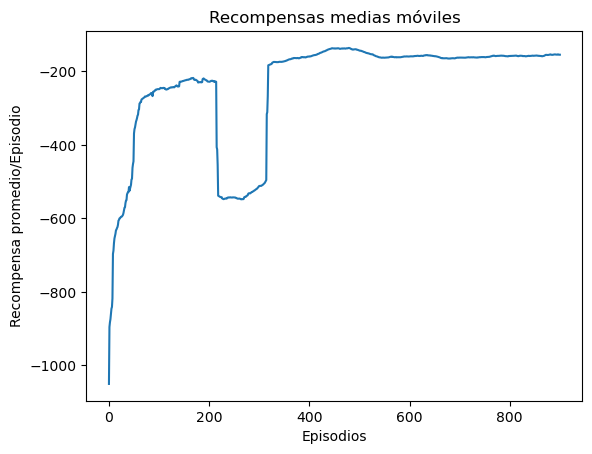

In [18]:
# Graficar la recompensa promedio móvil
plt.plot(np.arange(len(moving_avg_rewards)), moving_avg_rewards)
plt.title('Recompensas medias móviles')
plt.ylabel('Recompensa promedio/Episodio')
plt.xlabel('Episodios')
plt.show()

**2. Tasa de convergencia** <p>
Representa la diferencia entre la recompensa promedio al final del entrenamiento y al principio entre el número total de episodios. Esto sirve para descubrir qué tan rápido está mejorando el desempeño del agente a lo largo del tiempo. 

In [19]:
# Calculate the convergence rate
convergence_rate = (ep_rewards_table['avg'][-1] - ep_rewards_table['avg'][0]) / len(ep_rewards_table['avg'])
print("Convergence Rate:", convergence_rate)


Convergence Rate: 155.52
